<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_5_%D0%97%D0%B0%D0%B2%D0%B4_2_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import files
import pandas as pd
# Завантажуємо файл з комп'ютера
uploaded = files.upload()

# Завантажуємо датасет у DataFrame
df = pd.read_csv('student_data.csv')

# Друкуємо перші 5 рядків датасету
print(df.head())

Saving student_data.csv to student_data (2).csv
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Для зручності об'єднуємо оцінки в 1 стовпець
# Обчислення середнього значення для G1, G2 та G3
df['Grades'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Видалення старих стовпців G1, G2, G3
df = df.drop(columns=['G1', 'G2', 'G3'])

# Перегляд перших 5 рядків
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        6   
1      yes       no       5         3      3    1    1      3        4   
2      yes       no       4         3      2    2    3      3       10   
3      yes      yes       3         2      2    1    1      5        2   
4       no       no       4         3      2    1    2      5        4   

      Grades  
0   5.666667  
1   5.333333  
2   8.333333  
3  14.66

In [ ]:
# Вибір стовпців для моделювання
X = df.drop(columns=['Grades'])
y = df['Grades']

X_numeric = X.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Стандартизація числових даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBRegressor

# Функція для тренування і оцінки моделі
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# 1. Лінійна регресія
linear_model = LinearRegression()
mse_linear, r2_linear = evaluate_model(linear_model, X_train, y_train, X_test, y_test)

# 2. Random forest
rf_model = RandomForestRegressor()
# Підбір оптимальних параметрів для Random forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
mse_rf, r2_rf = evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)

# 3. Градаційний бустинг
xgb_model = XGBRegressor()
# Підбір оптимальних параметрів для Градаційного бустингу
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
mse_xgb, r2_xgb = evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)

# Виведення результатів
print(f'Лінійна регресія: MSE = {mse_linear}, R² = {r2_linear}')
print(f'Случайний ліс: MSE = {mse_rf}, R² = {r2_rf}')
print(f'Градаційний бустинг: MSE = {mse_xgb}, R² = {r2_xgb}')


Лінійна регресія: MSE = 12.159767560313618, R² = 0.17861225067375774
Случайний ліс: MSE = 11.709935015711574, R² = 0.2089982707643293
Градаційний бустинг: MSE = 12.970826026945119, R² = 0.12382555469671241


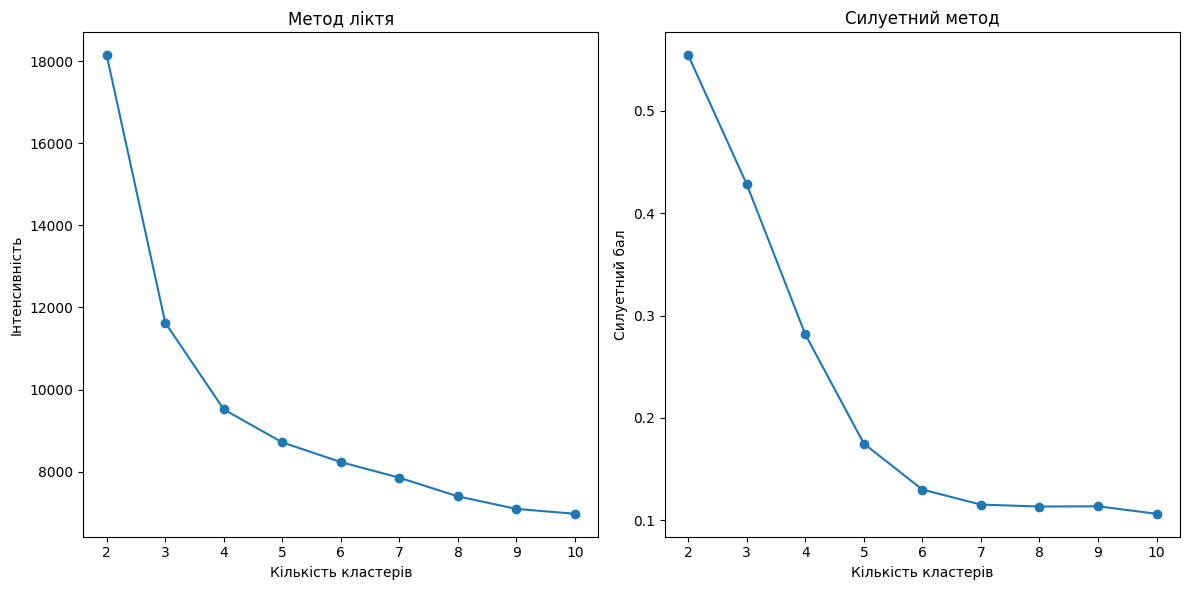

In [ ]:
import matplotlib.pyplot as plt

# Метод ліктя
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інтенсивність')

# Візуалізація силуетного методу
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Силуетний метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')

plt.tight_layout()
plt.show()


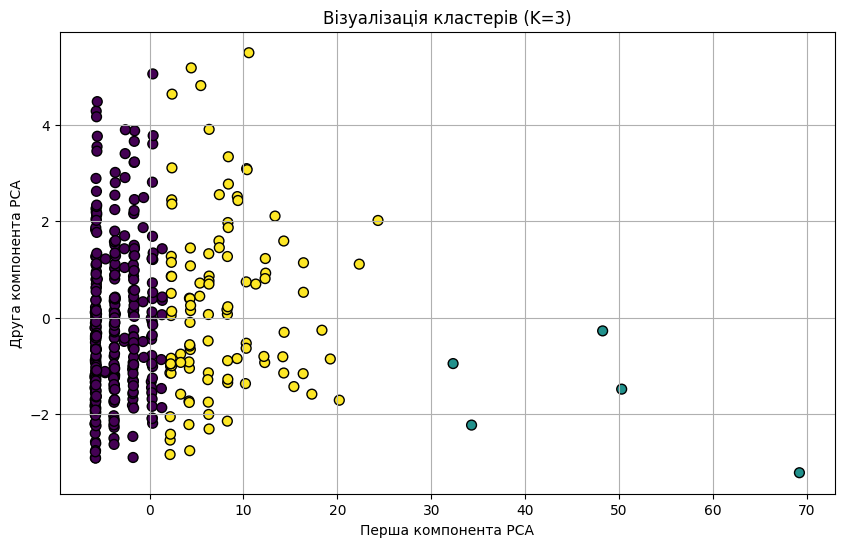

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Визначте оптимальну кількість кластерів (припустимо, що ви вирішили використовувати 3 кластери)
optimal_k = 3

# Створення моделі KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Отримання міток кластерів
clusters = kmeans.labels_

# Зменшення вимірності
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Візуалізація кластерів (K={optimal_k})')
plt.xlabel('Перша компонента PCA')
plt.ylabel('Друга компонента PCA')
plt.grid()
plt.show()

